In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

**Gradient descent** is an optimization algorithm used in machine learning and mathematical optimization. It's a method for finding the minimum of a function by iteratively adjusting the parameters in the direction of the steepest descent of the function. The goal is to reach the local or global minimum of the function by taking steps proportional to the negative of the gradient of the function at the current point. This process is repeated iteratively until a convergence criterion is met. Gradient descent is a fundamental technique used in training machine learning models, particularly in tasks like training neural networks.

# Derivative

The principal concept underlying gradient descent implementation is the **Derivative**. A derivative is usually presented as the rate of change of a function, for example $f(x)$ with respect to a variable (in this case x) representing the sensitivity of $f(x)$ for any value assumed by x: 
  
$$\frac{\Delta f}{\Delta x}$$


   **Derivative definition** is a local concept, calculated between an interval (between two points) in which the function is continuous (two input values $x_{1}$ and $x_{2}$, where $h=x_{2}-x_{1}$), and represented as the limit of that same interval when it gets down to 0, we usually found it as:

$$ f´(x)=\lim_{h \to 0}\frac{f(x_{1}+h)-f(x_{1})}{h}$$

   If we draw a line between the two input values (also known as the images of $x_{1}$ and $x_{2}$) what we obteined is a line that crosses the function $f(x)$ in the interval defined by $x_{1}$ and $x_{2}$ (secant line), as the interval is reduced, the images of the two input values, $f(x_{1})$ and $f(x_{2})$, tend to get closer, at a point that there is no distance between these, making $h=x_{2}-x_{1}=0$
   
  Consider the follow function: $$f(x)=1+x^{2}$$ 

In [2]:
def f(x):
    return 1+x**2

def Sec_line(function,x1,x2, variable):
    """""Sec_line function returns a single line between two  different points of a given function"""
    y1,y2=function(x1), function(x2)
    slope=(y1-y2)/(x1-x2)
    inter=y1-slope*(x1)
    return inter+slope*(variable)

<IPython.core.display.Javascript object>


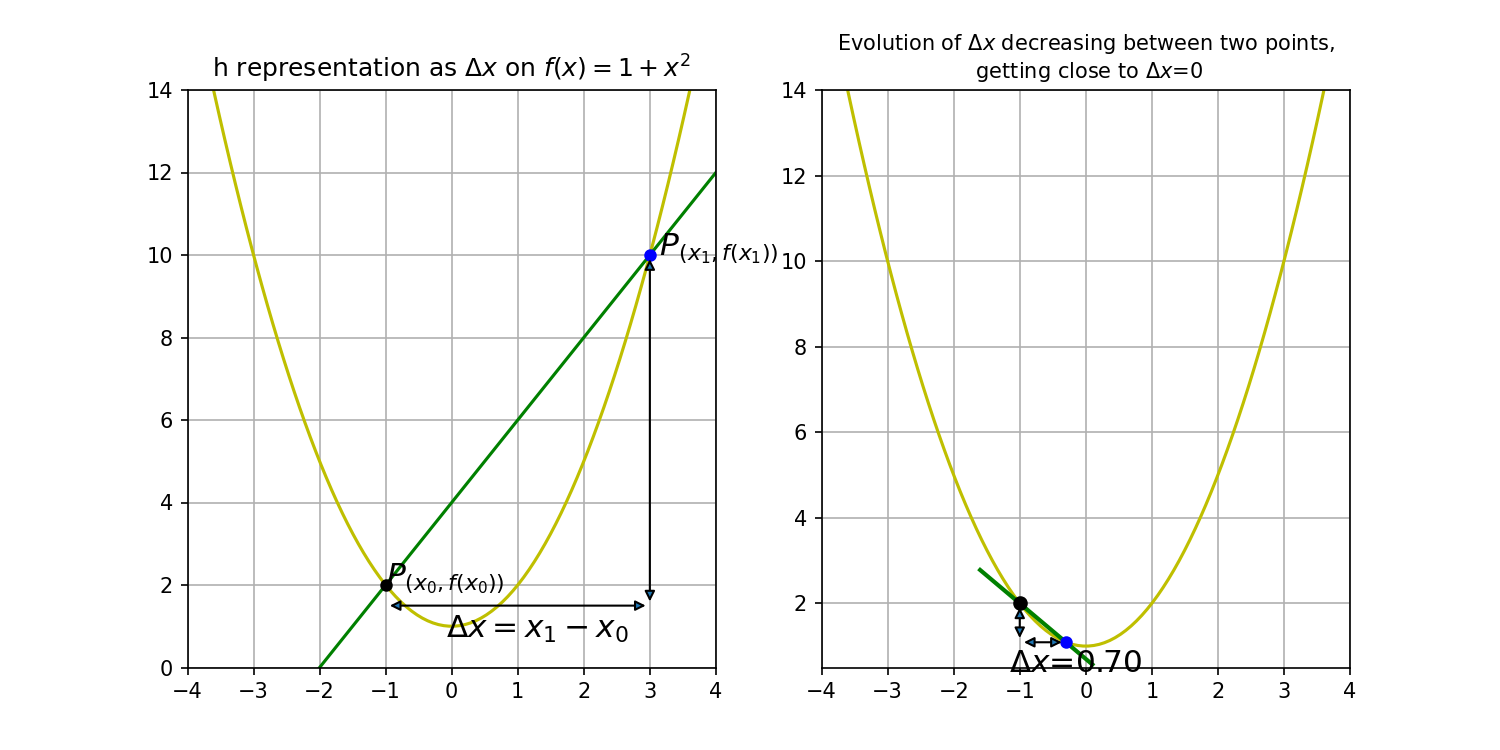

In [4]:
#Create a figure and a couple of axises inside this figure:
fig, ax = plt.subplots(1,2,figsize=(10,5))

#1_Developing the first axis:

#Define the domain of the independent variable to be used to plot the function of interest:
x = np.linspace(-4,4,100)
#Defining limits of plot representation among the two axis:
ax[0].set(xlim=(-4,4), ylim=(0,14))
#Plot the geometric objects such as function, the secant and some points of interes:
ax[0].plot(x,f(x), 'y')#function
ax[0].plot(x,Sec_line(f,-1,3,x),'g')#secant line
ax[0].plot(-1,f(-1), 'ok', ms=5)
ax[0].plot(3,f(3), 'ob', ms=5)
#Add some annotation to explain over the plot the geometrics concepts mentioned before:
ax[0].annotate("$ P_{(x_{0},f(x_{0}))}$",xy=(-1,f(-1)), fontsize=15)
ax[0].annotate(" $P_{(x_{1},f(x_{1}))}$",xy=(3,f(3)), fontsize=15)
ax[0].annotate("",xy=(3, 1.5), xycoords='data',xytext=(-1, 1.5), textcoords='data',
               arrowprops=dict(arrowstyle="<|-|>"))#Horizontal arrow
ax[0].annotate("",xy=(3, f(3)), xycoords='data',xytext=(3, 1.5), textcoords='data',
               arrowprops=dict(arrowstyle="<|-|>"))#Vertical line arrow
ax[0].text(1.3, 1.3, "$\Delta{x}=x_{1}-x_{0}$",rotation=0, horizontalalignment='center', verticalalignment='top', fontsize=15)
#Add a title to the axis:
ax[0].set_title("h representation as $\Delta{x}$ on $f(x)=1+x^{2}$")
#Setting a grid to follow a bit more comfortable any point of interest of our function
ax[0].grid(True)

#2_Developing the second axis, animated axis

ax[1].set_title("Evolution of $\Delta{x}$ decreasing between two points,\n getting close to $\Delta{x}$=0",
                fontsize=10)
ax[1].grid(True)
ax[1].plot(x,f(x),'y')
ax[1].set(xlim=(-4,4), ylim=(0.5,14))

#3_Create the objects to be animated:
#line to be updated
line, =plt.plot(x,Sec_line(f,-1,3.5,x), lw=2, color='g')
#point to be updated
point,=plt.plot([x[99]],[f(x[99])], 'ob', ms=5)
#horizontal double arrow to be updated
annotation_1=ax[1].annotate("", xy=(3, f(3)), xytext=(-1, f(3)), textcoords='data',
                          arrowprops=dict(arrowstyle="<|-|>"))
#vertical double arrow to be updated
annotation_2=ax[1].annotate("", xy=(-1, f(3)), xycoords='data', xytext=(-1, f(-1)), textcoords='data',
                            arrowprops=dict(arrowstyle="<|-|>"))
#text to be updated
annotation_3= ax[1].text(3/2, f(3)-0.15, "$\Delta{x}$", fontsize=15,rotation=0, horizontalalignment='center',
                         verticalalignment='top')
ax[1].plot(-1,f(-1),'ok')
#Create a collection of points that will be  the frames of our animation 
aux=[i for i in np.arange(-1,3.5,0.1)][::-1]
#Create the function to be call at each frame
def animation1 (i):
    x=np.linspace(-1.6,i+0.4,100)
    y=Sec_line(f,-1,i,x)
    point.set_data(i, f(i))
    line.set_data(x,y)
    annotation_1.set_position((i, f(i)))
    annotation_1.xy=(-1,f(i))
    annotation_2.set_position((-1, 2))
    annotation_2.xy=(-1,f(i))
    annotation_3.set_x(i/2)
    annotation_3.set_y(f(i)-0.15)
    annotation_3.set_text("$\Delta{x}$"+"={:.2f}".format(i-(-1)))
    #elements=(point, line, annotation_1, annotation_2, annotation_3)
    return point, line, annotation_1, annotation_2, annotation_3
#Create our func animation:
myAnimation1 = animation.FuncAnimation(fig, animation1, frames=aux, interval=110, repeat=True, blit=False)
#save as .gif
# writer = animation.PillowWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# myAnimation1.save('Derivative.gif', writer=writer)

plt.show()

   Taking this into a geometric perspective, as $f(x_{1})$ and $f(x_{2})$ gets closer we **Minimized** the distance between the two points, and what we finally get is a tangent line in one unique point.
   
   The derivative is a pretty handy concept that helps us in  **Optimization** tasks when finding the maximum or minimum values of functions, which is essential in optimizing various processes and systems, **specially gradient descent algorithm, one of the key components running in the backend of many of the submodules of ML libraries.**

# Gradient

The gradient, on the other hand, represents a generalization of the derivative for functions that depend on more than one variable (in the case of a single-variable function, the gradient is simply the derivative of that function). The gradient is a vector that points in the direction of the maximum rate of change of the function at a given point, and its magnitude indicates the maximum rate of change in that direction. The components of the gradient indicate how the function changes in each of the directions (axes) of the variables, then the gradient of $f$ can be formed, which is a vector containing all the partial derivatives of $f$ with respect to each variable. It is denoted as $\nabla f = \left(\frac{{\partial f}}{{\partial x_1}}, \frac{{\partial f}}{{\partial x_2}}, \ldots, \frac{{\partial f}}{{\partial x_n}}\right)$.


Therefore, while the derivative refers to the instantaneous rate of change of a function at a specific point, the gradient refers to the direction and magnitude of the maximum rate of change of a function at a point in the space of multiple variables.

# Gradient descent

The basic elements of gradient descent in ML applications:

1. **Objective Function (Cost or Loss Function)**:
The function that needs to be minimized. It represents the problem you are trying to solve or optimize. 

2. **Gradient**:
The gradient is the vector of partial derivatives of the objective function with respect to each parameter. It indicates the direction of steepest ascent. In mathematical notation, the gradient is denoted as ∇f(x).

3. **Learning Rate**:
The learning rate (also known as step size) determines the size of the steps taken in the direction of the gradient during each iteration. It is a hyperparameter that needs to be set appropriately. Too large a learning rate may lead to overshooting, and too small a learning rate may result in slow convergence.

4. **Update Rule**:
The formula used to update the parameters based on the gradient and the learning rate. It adjusts the parameters in the direction that reduces the value of the objective function.

5. **Convergence Criteria (or tolerance)**:
A stopping condition that determines when the optimization process should stop. This can be based on a maximum number of iterations, a certain level of tolerance, or other conditions.

6. **Iteration**:
The process of repeatedly updating the parameters using the update rule. Each iteration aims to move the parameters closer to the optimal values.

7. **Initial Guess (Starting Point)**:
The initial values assigned to the parameters before starting the optimization process. The optimization algorithm iteratively updates these values to reach the optimal solution.

## Gradient descent implementation on simple non-multivariable functions

**In the case of a single-variable function, the gradient is simply the derivative of that function.**

It is important to remember that to apply gradient descent we must know its expression and its operation, conceptually and geometrically:

$$x_{n+1} = x_{n} − γ_{n}∇f (x_{n})$$

Where:

* $x_{n}$ = Represents the current point in the search space or the current location at iteration n. It's the current value of the variable you are trying to optimize.
* $x_{n+1}$ = It's the next point or location in the search space. It's the value you update in each iteration to get closer to the minimum or maximum of the objective function.
* $γ_{n}$ = This is the learning rate. An intuitive way to consider the learning rate geometrically from the perspective of the cost function we want to optimize is as the step size, i.e., it's a factor that determines how big the change between $x_{n}$ and $x_{n+1}$ should be at each step until convergence to some local or absolute minimum.
* $- ∇f(x_{n})$ = Represents the gradient of the objective function evaluated at point $x_{n}$. The gradient is a vector that indicates the direction and magnitude of the fastest change in the function at the given point. To relate it to the above, we can see it in the following way: the gradient (a vector composed of the partial derivatives of the function with respect to each of the independent variables at the given point) locates the direction in which to proceed towards the location of a local minimum, and the learning rate reflects how far we move in that direction.

In [109]:
def simple_gradient_descent(function, derivative_function, x0, learning_rate, tolerance, max_iterations):
    '''
    function = function to be optimized (minimized)
    derivative_functio = derivative of function
    x0 = initial point of search
    learning_rate = value of the step towards the direction of gradient
    tolerance = condition to consider convergence
    max_iterations = epocs or maximum number of steps
    '''
    x = x0
    iteration = 0
    path = []
    while True:
        gradient = derivative_function(x)
        x -= learning_rate * gradient
        path.append((*x, function(*x)))
        iteration += 1
        if np.linalg.norm(gradient) < tolerance or iteration >= max_iterations:
            break
    
    return x, iteration, path

In [72]:
def function_1(x):
    return 3*x**4 + 4*x**3 - 12*x**2 + 7

def function_1_gradient(x):#in the context of single-variable functions the derivative
    return 12*x**3 + 12*x**2 - 24*x 

In [73]:
init_x = np.array([3], dtype=np.float64)
tasa_apren = 0.001
tol = 1e-12
maxit = 100000
minimum, n_iters, collection = simple_gradient_descent(function_1, function_1_gradient, init_x, tasa_apren, tol, maxit)

In [74]:
print(f'Minimum located: {(minimum[0], function_1(minimum[0]))}')
print(f'Number of iteration til converegence: {n_iters}')

Minimum located: (1.0000000000000266, 2.0)
Number of iteration til converegence: 832


In [75]:
collection[0]

(2.64, 142.68974848000005)

<IPython.core.display.Javascript object>


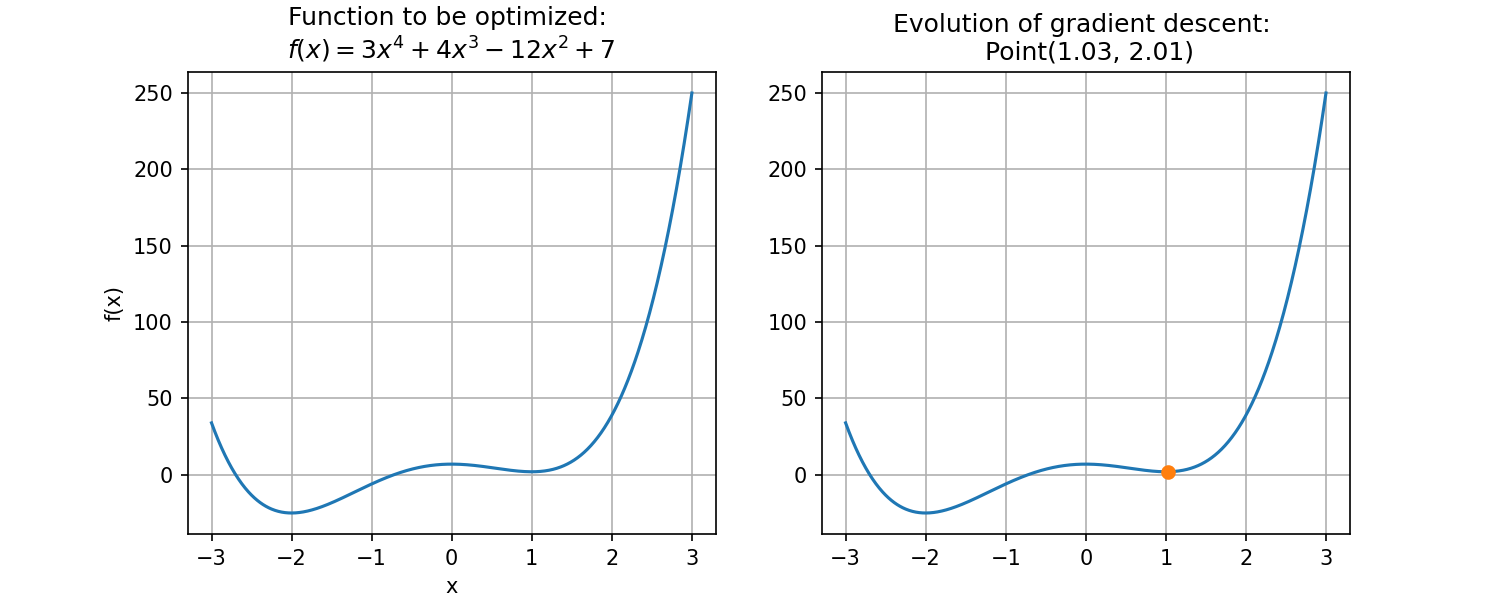

In [70]:
x = np.linspace(-3, 3, 1000)
y = function_1(x)
new_col = sorted(set([(np.round(i[0],2), np.round(i[1],2)) for i in collection]))[::-1]
fig2, (ax21, ax22) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax21.plot(x, y)
ax21.grid(True)
ax21.set_xlabel('x')
ax21.set_ylabel('f(x)')
ax21.set_title('Function to be optimized: \n$f(x) = 3x^4 + 4x^3 − 12x^2 + 7$')

ax22.plot(x, y)
ax22.grid(True)
ax22.set_title("Evolution of gradient descent: \n Point({:.2f}, {:.2f})".format(new_col[0][0], new_col[0][1]))
point, = ax22.plot(new_col[0][0],new_col[0][1], 'o')
def upD_point(i):
    point.set_data(new_col[i])
    new_title = "Evolution of gradient descent: \n Point({:.2f}, {:.2f})".format(new_col[i][0], new_col[i][1])
    ax22.set_title(new_title)
    return point,ax22

myAnimation2 = animation.FuncAnimation(fig2, upD_point, frames = len(new_col) , interval = 300, repeat=True)
# save as .gif
# writer = animation.PillowWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# myAnimation2.save('simple_descent_1.gif', writer=writer)

plt.show()

Cómo podemos comprobar, mediante este método corremos el riesgo de quedarnos estancados en mínimos locales, tal y como nos ha ocurrido en este caso, existen algunas soluciones que podemos implementar para mejorar nuestra función como:

1. Inicialización del algoritmo en otra región del espacion de soluciones.

2. Modificar la tasa de aprendizaje, con lo que estaríamos modificando la magnitud de los pasos en dirección al mayor decrecimiento en $f(x)$.

3. Multiarranque para explorar otras regiones del espacion de soluciones, implicaría la ejecución del paso 2 varias veces.

### New initialization 

In [243]:
new_init_x = np.array([-3], dtype=np.float64)
tasa_apren = 0.001
tol = 1e-12
maxit = 1e5
minimum_2, n_iters_2, collection_2 = simple_gradient_descent(function_1, function_1_gradient, new_init_x, tasa_apren, tol, maxit)
new_col_2 = sorted(set([(np.round(i[0],4), np.round(i[1],4)) for i in collection_2]))

In [244]:
print(f'Minimum located: {(minimum_2[0], function_1(minimum_2[0]))}')
print(f'Number of iteration til converegence: {n_iters_2}')

Minimum located: (-2.000000000000012, -25.0)
Number of iteration til converegence: 420


### Modification of learning rate

In [254]:
init_x = np.array([3], dtype=np.float64)
new_tasa_apren = 0.01
tol = 1e-12
maxit = 1e5
minimum_3, n_iters_3, collection_3 = simple_gradient_descent(function_1, function_1_gradient, init_x, new_tasa_apren, tol, maxit)
new_col_3 = sorted(set([(np.round(i[0],4), np.round(i[1],4)) for i in collection_3]))[::-1]

In [255]:
print(f'Minimum located: {(minimum_3[0], function_1(minimum_3[0]))}')
print(f'Number of iteration til converegence: {n_iters_3}')

Minimum located: (-1.9999999999999967, -25.0)
Number of iteration til converegence: 32


### Multi-start algorithm

In [256]:
def multi_start_gradient_descent (function, 
                                  derivative_function,
                                  learning_rate, 
                                  tolerance, 
                                  max_iterations,
                                  *n_starts,
                                  random_range = int()):
    '''
    multi_start_gradient_descent incorporat all the functionality of simple_gradient_descent with two new arguments:
    n_starts = the x0 initial position from to start gradient descent, it can be an integer or a callection of integers
    random_range = if n_starts is None, a random integer within a range defined by random_range will be selected using 
    a discrete uniform distribution
    '''
    
    if len(n_starts) == 0:
        init_my_gd = np.array(np.random.randint(random_range, size = 1), dtype=np.float64)
        return simple_gradient_descent(function, derivative_function, init_my_gd, learning_rate, tolerance, max_iterations)
    
    elif len(n_starts) == 1:
        init_my_gd = np.array([n_starts[0]], dtype=np.float64)
        return simple_gradient_descent(function, derivative_function, init_my_gd, learning_rate, tolerance, max_iterations)
    
    else:
        solutions = {}
        for i in n_starts:
            solution = multi_start_gradient_descent (function, derivative_function, learning_rate, tolerance, max_iterations, i)
            solutions[i] = solution
        return solutions

In [257]:
multi_start_result = multi_start_gradient_descent (function_1, function_1_gradient, tasa_apren, tol, maxit, -3,0.5,4)

In [258]:
x_inits = list(multi_start_result.keys())
print(f'Initilizations with multi_start_gradient_descent: {x_inits[0], x_inits[1], x_inits[2]}')
print(f'Minimums located with multi_start_gradient_descent: {*multi_start_result[-3][0], *multi_start_result[0.5][0], *multi_start_result[4][0]}')
print(f'Iterations till convergencewith  multi_start_gradient_descent: {multi_start_result[-3][1], multi_start_result[0.5][1], multi_start_result[4][1]}')

Initilizations with multi_start_gradient_descent: (-3, 0.5, 4)
Minimums located with multi_start_gradient_descent: (-2.000000000000012, 0.9999999999999739, 1.0000000000000269)
Iterations till convergencewith  multi_start_gradient_descent: (420, 861, 833)


In [259]:
#adaptation of the path followed for gradient descent in each of the methods for display purpose:
all_multi_sols = []
for solution_i in multi_start_result:
    _ = multi_start_result[solution_i][2]
    resume_solution = sorted(set([(np.round(i[0],4), np.round(i[1],4)) for i in _]))
    all_multi_sols.append(resume_solution)
    
#view lenght of data:
print(f'number of points in New initialization method {len(new_col_2)}')
print(f'number of points in Modification of learning rate method {len(new_col_3)}')
#-------
#calculate Multi-start algorithm method new_collections:
new_col_4 = all_multi_sols[0]
new_col_5 = all_multi_sols[1]
new_col_6 = all_multi_sols[2][::-1]
print(f'number of points in Multi-start algorithm method, first initialization {len(new_col_4)}')
print(f'number of points in Multi-start algorithm method, second initialization {len(new_col_5)}')
print(f'number of points in Multi-start algorithm method, third initialization {len(new_col_6)}')

number of points in New initialization method 93
number of points in Modification of learning rate method 14
number of points in Multi-start algorithm method, first initialization 93
number of points in Multi-start algorithm method, second initialization 196
number of points in Multi-start algorithm method, third initialization 169


In [260]:
#adaptation of lenght of each set of points for animation in subplots:
my_collection = [new_col_2, new_col_3, new_col_4, new_col_6] 
for collection_ in my_collection:
    print(collection_[-1], len(collection_))

(-2.0, -25.0) 93
(-2.0, -25.0) 14
(-2.0, -25.0) 93
(1.0, 2.0) 169


In [261]:
my_collection = [new_col_2, new_col_3, new_col_4, new_col_6] 
for collection_ in my_collection:
    collection_.extend([collection_[-1] for i in range(len(new_col_5)-len(collection_))])

In [262]:
#adaptation of lenght of each set of points for animation in subplots:
my_collection = [new_col_2, new_col_3, new_col_4, new_col_6] 
for collection_ in my_collection:
    print(collection_[-1], len(collection_))

(-2.0, -25.0) 196
(-2.0, -25.0) 196
(-2.0, -25.0) 196
(1.0, 2.0) 196


<IPython.core.display.Javascript object>


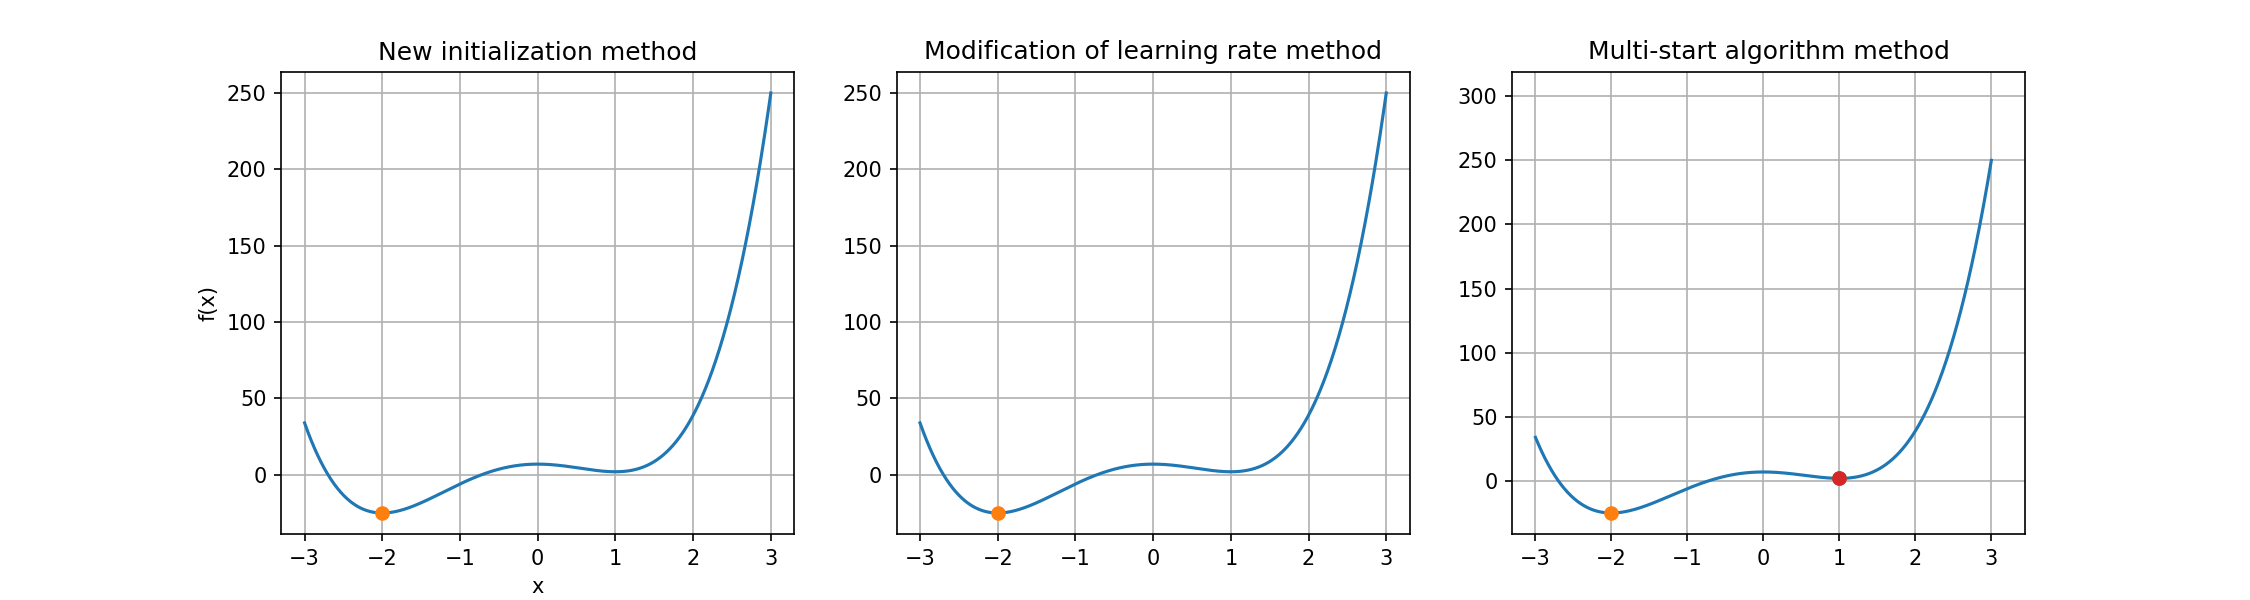

In [273]:
fig3, (ax31, ax32, ax33) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
x = np.linspace(-3, 3, 1000)
y = function_1(x)

ax31.set_title('New initialization method')
ax31.plot(x, y)
point2, = ax31.plot(new_col_2[0][0],new_col_2[0][1], 'o')
ax31.grid(True)
ax31.set_xlabel('x')
ax31.set_ylabel('f(x)')


ax32.plot(x, y)
ax32.grid(True)
ax32.set_title('Modification of learning rate method')
point3, = ax32.plot(new_col_3[0][0],new_col_3[0][1], 'o')


ax33.plot(x, y)
ax33.grid(True)
ax33.set_title('Multi-start algorithm method')
point4, = ax33.plot(new_col_4[0][0],new_col_4[0][1], 'o')
point5, = ax33.plot(new_col_5[0][0],new_col_5[0][1], 'o')
point6, = ax33.plot(new_col_6[0][0],new_col_6[0][1], 'o')


def upD_point_c(i):
    point2.set_data(new_col_2[i])
    point3.set_data(new_col_3[i])
    point4.set_data(new_col_4[i])
    point5.set_data(new_col_5[i])
    point6.set_data(new_col_6[i])
    return point2, point3, point4, point5, point6, ax31, ax32, ax33

myAnimation3 = animation.FuncAnimation(fig3, upD_point_c, frames = len(new_col_5) , interval = 180, repeat=True)
# save as .gif
# writer = animation.PillowWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# myAnimation3.save('simple_descent_2.gif', writer=writer)

plt.show()

**Note:** In these cases, though we have represent a good insight of gradient descent on simple non-multivarible functions,  we have not implement a function with the capability of calculate the derivative (by it's definition) at each point to evaluate the gradient, this has been solved by adding directly the derivative of the function as an argument. 

The next lines will be dedicated to cover a simple implementation by hand a gradient descent algorithm on multivariable functions. In this case the pre-accommodation of the derivative has no place, since the gradient must be able to be calculated for each and every one of the independent variables that define the function, (as many as there are) therefore, these partial derivatives will be calculated by hand using the definition of derivative

## Gradient descent implementation on multivariable functions by hand:

Here is where **Gradient Descent** really excels, when dealing with multivariable functions, in this case, instead of using the derivative derived from a simple non-multivariable function, the gradient is formed using partial derivatives:

Let $f(\mathbf{x})$ be a function of $n$ variables, and let $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ be the vector of variables.

The partial derivative of $f$ with respect to $x_i$, denoted as $\frac{\partial f}{\partial x_i}$, is defined as:

$$\frac{{\partial f}}{{\partial x_i}} = \lim_{{h \to 0}} \frac{{f(x_1, x_2, \ldots, x_i + h, \ldots, x_n) - f(x_1, x_2, \ldots, x_i, \ldots, x_n)}}{h}$$



In this definition, the limit is taken as $h$ approaches zero to calculate the incremental ratio that measures the rate of change of the function with respect to the variable $x_i$. The other variables $x_j$ (with $j \neq i$) are held constant during this process (this is relevant for the development of the function that will explore the function in search of minimums).

If the function $f$ is differentiable with respect to all variables, then the gradient of $f$ can be formed, which is a vector containing all the partial derivatives of $f$ with respect to each variable. It is denoted as $\nabla f = \left(\frac{{\partial f}}{{\partial x_1}}, \frac{{\partial f}}{{\partial x_2}}, \ldots, \frac{{\partial f}}{{\partial x_n}}\right)$.


In [292]:
#Our function
def complex_gradient_descent (func, iterations, dims, learning_rate = .1, h = 0.00001, tol = 1e-6):
    '''
    complex_gradient_descent function implement a simple way to evaluate gradient descent 
    over multivariate functions by conforming the gradient vector by calculating each parcial 
    derivative by the definition of the derivative concept, without the need of precalculte the 
    derivative of the function to minimized.
    func = func to optimized, in the context of gradient descent, minimized
    iterations = number of iterations
    dims = number of independent variables
    learning_rate = value of the step towards the direction of gradient
    h = denominator of the limit that represent the definition of partial derivative (close to 0)
    tol = condition to consider convergence
    '''
    punto_init = list(np.random.uniform(-2,2,size=(1,dims-1))[0])
    new_point = np.array(punto_init)
    path = []
    for iteration in range(iterations):
        deriv_parcial_pto = []
        for i in range(dims-1):
            f_a = func(*new_point)
            increment = np.zeros(dims-1)
            increment[i] = h
            increment = new_point + increment
            f_increment =  func(*increment)
            deriv_i = (f_increment-f_a) /h
            deriv_parcial_pto.append(deriv_i)
        new_point -= learning_rate * np.array(deriv_parcial_pto)
        path.append(tuple(new_point))
        if 2 < len(path):
            limit_value = abs(func(*path[iteration-1]) - func(*new_point))
            if limit_value < tol:
                break
    return punto_init, path, iteration, func(*new_point)

We will cover the above by introducing an example in a 3 dimensional space (the easiest way to follow the procedure):$$f(x, y) = \sin(\frac{1}{2} x^2- \frac{1}{4}y^2 + 3)· \cos(2x+1-e^y)$$

In [289]:
trigonometric = lambda X, Y: np.sin(1/2 * X**2 - 1/4 * Y**2 + 3)*np.cos(2* X + 1 - np.e**Y)

<IPython.core.display.Javascript object>


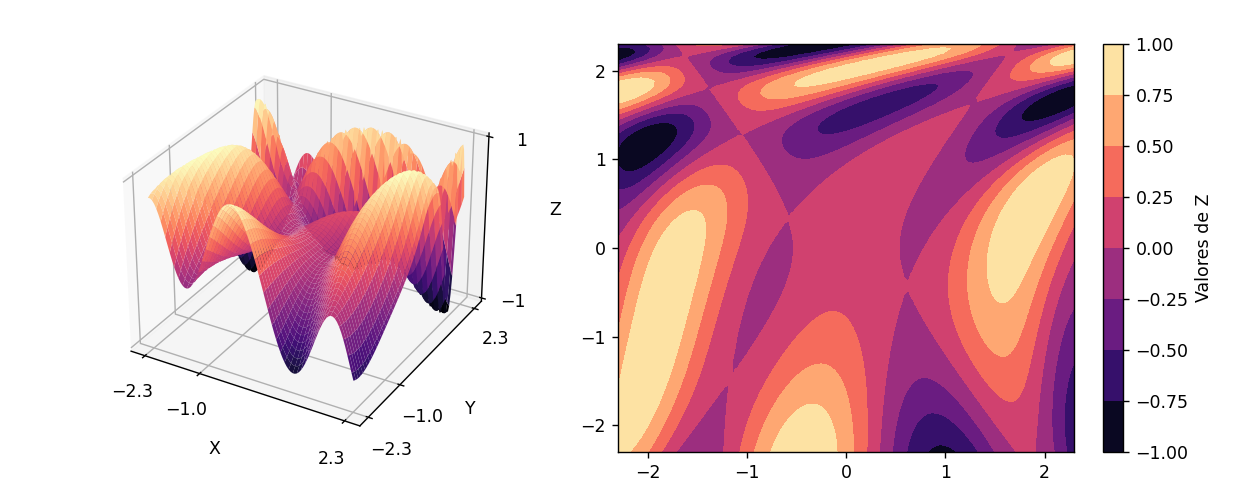

In [352]:
#Funtion view and proyection over the XY plane
range_ = 2.3
resolution = 100
X = np.linspace(-range_, range_, resolution)
Y = np.linspace(-range_, range_, resolution)
X, Y = np.meshgrid(X,Y)
Z = trigonometric (X, Y)

fig4 = plt.figure(figsize=(10,4))

ax1 = fig4.add_subplot(121, projection='3d')
surface = ax1.plot_surface(X, Y, Z, cmap="magma")

ax2 = fig4.add_subplot(122)
im = ax2.contourf(X, Y, Z, cmap = 'magma')

cb = fig4.colorbar(im, ax=ax2, label='Valores de Z')

ax1.set_ylabel('Y'), ax1.set_xlabel('X'), ax1.set_zlabel('Z')
ax1.set_zticks([Z.min(), Z.max()])
ax1.set_yticks([Y.min(),Z.min(), Y.max()])
ax1.set_xticks([X.min(),Z.min(), X.max()])
fig4.suptitle('')
#ploteo de figura
plt.tight_layout()
plt.show()

In [359]:
#we execute our function
init, points, num_iter, optimal = complex_gradient_descent(trigonometric, 3000, 3)

<IPython.core.display.Javascript object>


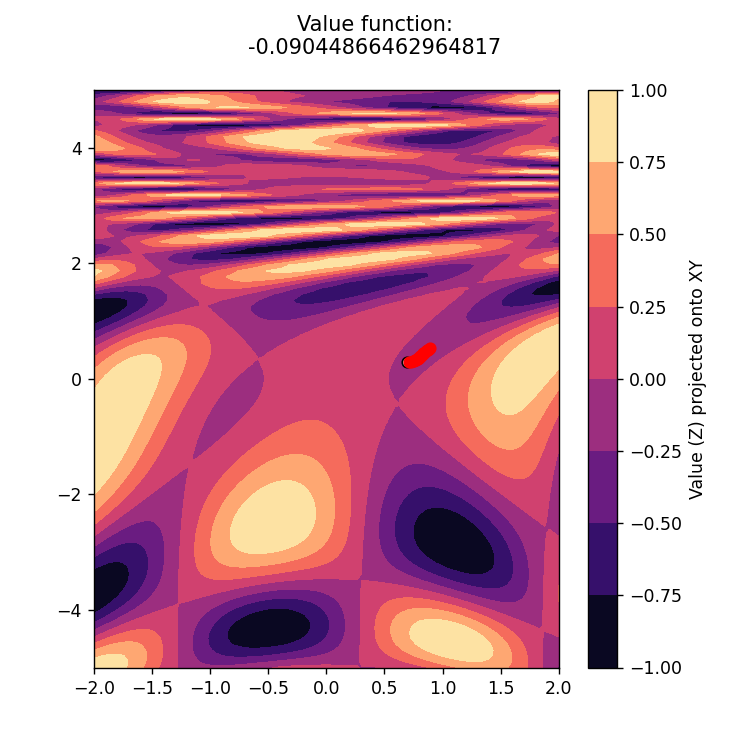

In [360]:
path_X = [x[0] for x in points]
path_Y = [y[1] for y in points]
rangeX = 2
rangeY = 5
resolution = 100
X = np.linspace(-rangeX, rangeX, resolution)
Y = np.linspace(-rangeY, rangeY, resolution)
X, Y = np.meshgrid(X,Y)
Z = trigonometric (X, Y)

fig5, ax  = plt.subplots(figsize = (6,6))
im = ax.contourf(X, Y, Z, cmap = 'magma')

cb = fig5.colorbar(im, ax=ax, label='Value (Z) projected onto XY')
sc = ax.scatter(init[0] , init[1], color = 'w', edgecolor = 'k')
point, = plt.plot([init[0]],[init[0]], 'o', color = 'r')

def update_grads_points(frame):
    point.set_data(path_X[:frame], path_Y[:frame])
    new_Z = trigonometric (path_X[frame], path_Y[frame])
    fig5.suptitle(f'Value function:\n{new_Z}')
    return point,

myAnimation4 = animation.FuncAnimation(fig5, update_grads_points, frames = 50, interval = 200,  blit=True)

# save as .gif
# writer = animation.PillowWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# myAnimation4.save('simple_descent_3.gif', writer=writer)


plt.show()

# Conclusions

As has been demonstrated in this notebook, the manual implementation of gradient descent, along with several of its configuration and application alternatives, is very easy to understand. Geometric representations greatly assist in following the process across the surface or curve that one aims to minimize.